<a href="https://colab.research.google.com/github/andreac941/tutorials/blob/main/A1b_DL_TC5033_AD2023_andrea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

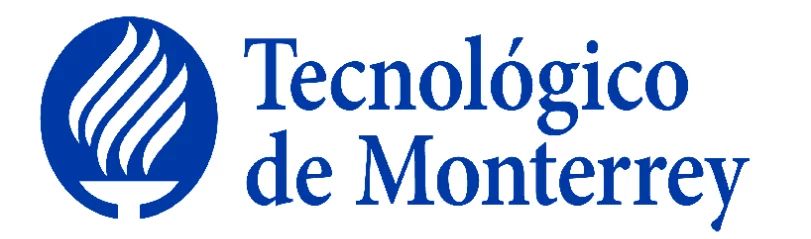


## **Maestría en Inteligencia Artificial Aplicada**

## **Course: Advanced Machine Learning Methods**
### Tecnológico de Monterrey
### Lead Professor: José Antonio Cantoral Ceballos

## **Activity 1b**
### **Implementing a Fully Connected Network for Kaggle ASL Dataset**

# TC 5033

- Alexis Hernández Martínez A01016308
- Rigoberto Vega Escudero A01793132
- Rodrigo Rodríguez Rodríguez A01183284
- Andrea Carolina Treviño Garza A01034993

## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [31]:
#Import libraries:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
#DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
DATA_PATH = '' #Files uploaded in temporary colab file
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [33]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [34]:
#Train dataset size:
train_df.shape

(27455, 785)

In [35]:
#Validation dataset size:
valid_df.shape

(7172, 785)

### Import Images

In [36]:
#Labels column of train dataset size:
len(train_df['label'])

27455

In [37]:
#Reshape of the array of each dataset for Y(real values):
y_train = np.array(train_df['label']).reshape(len(train_df['label']),1)
y_val = np.array(valid_df['label']).reshape(len(valid_df['label']),1)

In [38]:
#Delete row of labels in original datasets to get the data for X (input data):
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [39]:
#Definition of function for spliting datasets:
def split_val_test(x, y, pct=0.5, shuffle=True):
    """
    Split the dataset (x, y) into validation and test sets.

    Parameters:
    - x: Input data (features)
    - y: Labels
    - pct: Percentage of data to be allocated for the validation set
    - shuffle: Whether to shuffle the data before splitting

    Returns:
    - x_val: Validation data
    - y_val: Validation labels
    - x_test: Test data
    - y_test: Test labels
    """

    # Determine the number of samples to allocate for validation
    num_samples = len(x)
    num_val_samples = int(num_samples * pct)

    # Optionally shuffle the data
    if shuffle:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        x = x[indices]
        y = y[indices]

    # Split the data
    x_val, x_test = x[:num_val_samples], x[num_val_samples:]
    y_val, y_test = y[:num_val_samples], y[num_val_samples:]

    return x_val, y_val, x_test, y_test


In [40]:
#Impleting function for spliting validation & testing datasets:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [41]:
#Validation of the shape/size of each data set:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(27455, 784)
(3586, 784)
(3586, 784)
(27455, 1)
(3586, 1)
(3586, 1)


In [42]:
#Letters define with a hand sign that require movement were deleted (j & z)
alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

* Normalization of data by substracting the mean and dividing it by the standard deviation, with the objective of having a mean of 0 and a deviation of 1. Instead of dividing each dataset by 255 and getting a range between of values 0 and 1.
* Normalization of the 3 datasets with the statistical values of the training data is required.

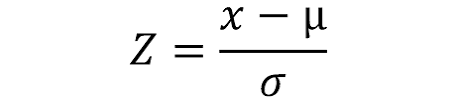

In [43]:
#Definition of funtion for normalization:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [44]:
#Defining the mean & standard deviation of training dataset.
x_mean = x_train.mean()
x_std = x_train.std()

#Normalization of the 3 datasets with the statistical values of the training data is required to avoid data leakage.
x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [45]:
print("As expected the mean is almost zero:",x_train.mean())
print("As expected the standard deviation is almost one:",x_train.std())
print("Maximum value of training dataset: ", x_train.max())

As expected the mean is almost zero: 3.6268384e-06
As expected the standard deviation is almost one: 0.99999946
Maximum value of training dataset:  1.9624788


### Graph samples:

In [48]:
#Dictionary for understanding which letter corresponds to each number label:
letters = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'K', 10:'L', 11:'M', 12:'N', 13:'O', 14:'P', 15:'Q', 16:'R', 17:'S', 18:'T', 19:'U', 20:'V', 21:'W', 22:'X', 23:'Y'}
no_letter = 20
letters[no_letter] #range 0 to 23

'V'

In [51]:
# Function to plot images:
def plot_samples(samples, labels=None, title=None):
    """
    Plot a list of image samples.

    Parameters:
    - samples: List of image data (numpy arrays)
    - labels: Optional list of labels
    - title: Title for the plot
    """
    num_samples = len(samples)
    num_rows = 1
    num_cols = num_samples

    plt.figure(figsize=(15, 5)) #size fot plotting the image
    if title:
        plt.suptitle(title, fontsize=16)

    for i in range(num_samples):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(samples[i].reshape(28, 28), cmap='gray')  # Reshape to (28, 28)
        plt.axis('off')
        if labels:
            plt.title(f"Label: {labels[i]}")

Label - 15 corresponds to letter - Q


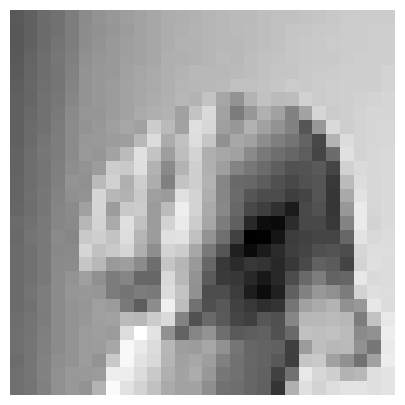

In [53]:
# Randomly select 1 sample:
random_indices = random.sample(range(len(x_train)), 1)
sample_images = x_train[random_indices]
ind1 = y_train[random_indices]
l1 = list(ind1[0])[0]
print("Label -", l1, "corresponds to letter -", letters[l1])

# Plot the random samples
plot_samples(sample_images)

plt.show()

Here you can see the hand sign for each letter (confirming that the label for the previous image display is correct):

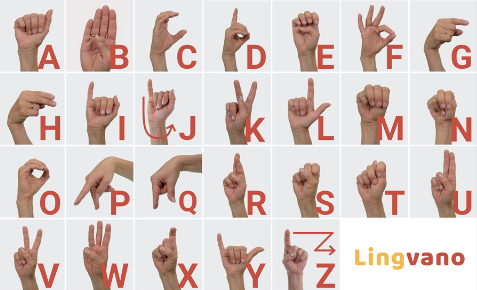

### Model equations:


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Additional functions:

#### Mini batches

In [54]:
#Definition of function for creating minibatches of input data:
def create_mini_batches(mb_size, x, y, shuffle=True):
    """
    Create mini-batches of data.

    Parameters:
    - mb_size: Size of each mini-batch
    - x: Input data
    - y: Labels
    - shuffle: Whether to shuffle the data before creating mini-batches

    Returns:
    - A generator that yields mini-batches of (x_batch, y_batch)
    """
    assert x.shape[0] == y.shape[0], 'Error on samples size'
    total_data = x.shape[0]

    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]

    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

In [55]:
#Definition of function for initializing model parameters:
def initialize_parameters(input_size, neurons):
    """
    Initialize parameters (weights and biases) for a fully connected network.

    Parameters:
    - input_size: Number of input features
    - neurons: List of integers specifying the number of neurons in each layer

    Returns:
    - A dictionary containing initialized parameters for each layer
    """
    parameters = {}
    num_layers = len(neurons)

    for layer in range(num_layers):
        if layer == 0:
            # Input layer to the first hidden layer
            W = np.random.randn(neurons[0], input_size) * 0.001
            b = np.zeros((neurons[0], 1))
        else:
            # Hidden layers or output layer
            W = np.random.randn(neurons[layer], neurons[layer-1]) * 0.001
            b = np.zeros((neurons[layer], 1))

        parameters[f'W{layer + 1}'] = W
        parameters[f'b{layer + 1}'] = b

    return parameters

In [56]:
# Example usage:
input_size = 28 * 28
neurons = [200, 23]
parameters = initialize_parameters(input_size, neurons)

# Print the shapes of initialized parameters
for layer in range(1, len(neurons) + 2):
    if f'W{layer}' in parameters:
        print(f"Shape of W{layer}: {parameters[f'W{layer}'].shape}")
    if f'b{layer}' in parameters:
        print(f"Shape of b{layer}: {parameters[f'b{layer}'].shape}")

Shape of W1: (200, 784)
Shape of b1: (200, 1)
Shape of W2: (23, 200)
Shape of b2: (23, 1)


## Nuestra clase Linear, ReLU y Sequential

In [57]:
#A new class is created, attributes can be added to a class (It's easier to implement the gradient with a class):
class np_tensor(np.ndarray): pass

In [58]:
#Here we can validate that a numpy array & and class from np tensor are "equal" but not the same type of data.
#This class inherits properties of the numpy array, but allows aditional attributes.
a = np.array([0, 0])
b = a.view(np_tensor)

print(type(a))
print(type(b))
print(a == b)
print(a is b)

<class 'numpy.ndarray'>
<class '__main__.np_tensor'>
[ True  True]
False


###  Clase Linear

In [60]:
#Time to define our class, which needs to be initialize, to know how to do a forward pass & a backward pass.
class Linear():
    def __init__(self, input_size, output_size):#self refers to created instance
        '''
        Init parameters utilizando Kaiming He - Best initialization type for deep neural networks
        input_size: the size of previous layer
        output_size: number of neurons in layer
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor) #W = weight (.view generates a new view without changing object)
        self.b = (np.zeros((output_size, 1))).view(np_tensor) #b =  bias
    def __call__(self, X): # forward pass (__call__ instance of Linear funtion can be pass as a function directly)
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z): #backward pass (X=input, Z=output)
        X.grad = self.W.T @ Z.grad #Attribute grad for X - Gradient of W respect to Z
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True) #sum of all elements in columns

### Clase ReLU

In [61]:
#Definition of ReLU class:
class ReLU(): #ReLU doesn't have parameters
    def __call__(self, Z): #Forward pass for ReLU
        return np.maximum(0, Z)
    def backward(self, Z, A): #Backward pass for ReLU
        Z.grad = A.grad.copy() #copy of received elements (A=activation)
        Z.grad[Z <= 0] = 0 #If grandient of Z is less than 0, then it should pass them as 0


### Clase Sequential

In [63]:
#Definition of class for organizing our model layers:
class Sequential_layers(): #similar to pytorch
    def __init__(self, layers):
        '''
        layers - list which contains Linear/ReLU type objects.
        '''
        self.layers = layers #list of layers
        self.x = None #saves Z outputs or activations A of each layer in a forward pass. Temporarily saves all activations
        self.outputs = {} #dictionary for savings activations A more permanently for backpropagation
    def __call__(self, X):
        self.x = X  #X input
        self.outputs['l0'] = self.x #Layer0 (l0) is equal to input elements.
        for i, layer in enumerate(self.layers, 1): #enumerate elements from layers since #1
            self.x = layer(self.x) # temporarily save each element from layers (linear/reLU objects)
            self.outputs['l'+str(i)]=self.x #saves it in outputs dictionary
        return self.x #it will have the values of last layer (scores)
    def backward(self): # to implement backward pass to all layers (in each instance & object in self).
        for i in reversed(range(len(self.layers))): #enumerate in reverse doesn't exists
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)]) #inputs=li, outputs=li+1
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue #Linear has parameters to update, ReLU doesn't, so we skip it.
            layer.W = layer.W - learning_rate * layer.W.grad #Stochastic learning descent
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X): #only for trained model, to predict model's output
        return np.argmax(self.__call__(X)) # return the best score (maximum value)

### Cost Function

In [65]:
#Definition of our Activation Function & our Loss Function in just 1 function:
def softmaxXEntropy(x, y): #Softmax X entropy, receives x=scores & y=labels
    batch_size = x.shape[1] #column dimension has the size of the batch
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy() #copy of probs to be able to return it

    # Cost Function
    y_hat = probs[y.squeeze(), np.arange(batch_size)] #prediction = y_hat
    cost = np.sum(-np.log(y_hat)) / batch_size # -ln(model prediction)

    # Calculate gradients
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx, select model prediction & substract the value of right class y_hat-y
    x.grad = probs.copy() #x=input -->value from last layer

    return preds, cost

### Loop de entrenamiento

In [66]:
#Definition of training function:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_mini_batches(mb_size, x_train, y_train)): #loop in minibatches function
            scores = model(x.T.view(np_tensor)) #receives x transposed, as np_tensor object
            _, cost = softmaxXEntropy(scores, y) #we just call the cost values
            model.backward() #backward pass function & backward in each element.
            model.update(learning_rate)
        print(f'Epoch {epoch}:cost: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}') #we call accuracy function

In [67]:
#Definition of accuracy function:
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_mini_batches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze()) #it sums correct predicted values if they are equal to equal real labels
        total += pred.shape[1]
    return correct/total

### Create your model and train it

In [68]:
#Model creation with classes previously defined
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 24)])
mb_size = 512
learning_rate = 1e-4
epochs = 30

In [69]:
#Time to train our model with the selected parameters:
train(model, epochs, mb_size, learning_rate)

Epoch 0:cost: 1.026354421465515, accuracy: 0.5814277746793084
Epoch 1:cost: 0.6138068067588822, accuracy: 0.6787506971556051
Epoch 2:cost: 0.3169418276983887, accuracy: 0.6912994980479643
Epoch 3:cost: 0.20678332493728652, accuracy: 0.7163970998326826
Epoch 4:cost: 0.1520084486892612, accuracy: 0.7267150027886224
Epoch 5:cost: 0.1094191406222684, accuracy: 0.7367540435025097
Epoch 6:cost: 0.0839444348478408, accuracy: 0.7387060791968767
Epoch 7:cost: 0.06538391085827493, accuracy: 0.7518126045733408
Epoch 8:cost: 0.048916621984948366, accuracy: 0.7557166759620747
Epoch 9:cost: 0.045505964516905986, accuracy: 0.7576687116564417
Epoch 10:cost: 0.040775690527657775, accuracy: 0.7593418851087562
Epoch 11:cost: 0.03432821953761916, accuracy: 0.769659788064696
Epoch 12:cost: 0.024574507363645644, accuracy: 0.7668711656441718
Epoch 13:cost: 0.030213344034749755, accuracy: 0.7660345789180145
Epoch 14:cost: 0.023104241098604917, accuracy: 0.7685443390964863
Epoch 15:cost: 0.02003098321851642, a

In [70]:
print(accuracy(x_test, y_test, mb_size)) #accuracy for test values

0.7802565532626883


### Test your model on Random data from your test set

2 corresponds to letter C


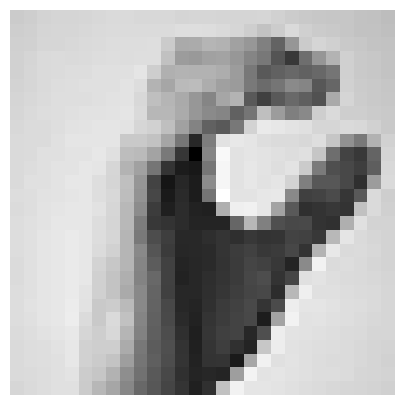

the predicted value is: 2, the real value is: 2


In [71]:
#Let's see the label for a random image on the test set:
random_indices = random.sample(range(len(x_test)), 1)
sample_images = x_test[random_indices]
ind2 = y_test[random_indices]
l2 = list(ind2[0])[0]
print(l2, "corresponds to letter", letters[l2])

# Plot the random sample:
plot_samples(sample_images)
plt.show()

#Predicted value from our model VS real value.
pred = model.predict(x_test[random_indices[0]].reshape(-1, 1))
print(f'the predicted value is: {pred}, the real value is: {y_test[random_indices[0]][0]}')

In [ ]:
#https://www.lingvano.com/asl/wp-content/uploads/sites/3/2022/11/sign-language-alphabet-preview.png

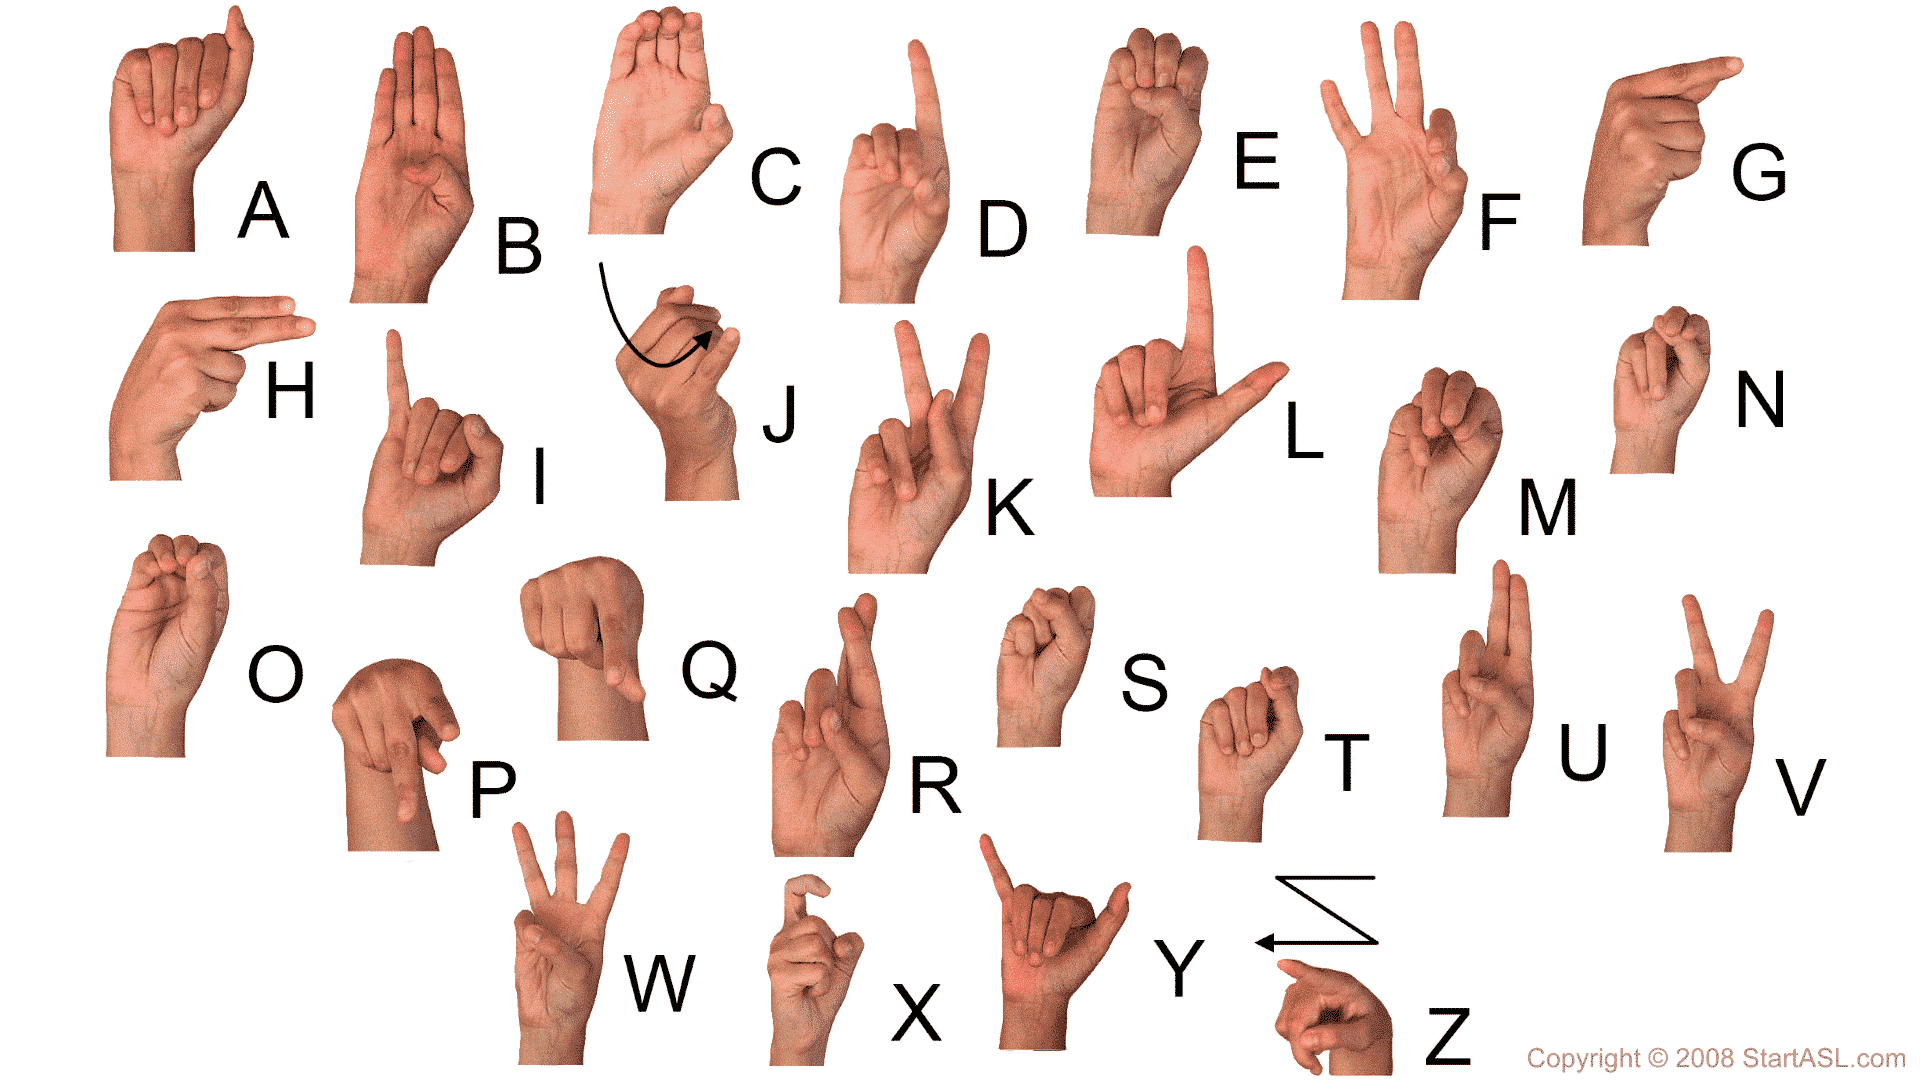

In [82]:
import urllib.request
from PIL import Image

urllib.request.urlretrieve(
  'https://www.startasl.com/wp-content/uploads/asl-alphabet_wallpaper_1920x1080.png',
   "img.jpg")
img = Image.open('img.jpg')
img.thumbnail((1920,1080), Image.LANCZOS) # Resize to half to reduce the size of this notebook.
img

AttributeError: ignored

<Figure size 1200x800 with 0 Axes>

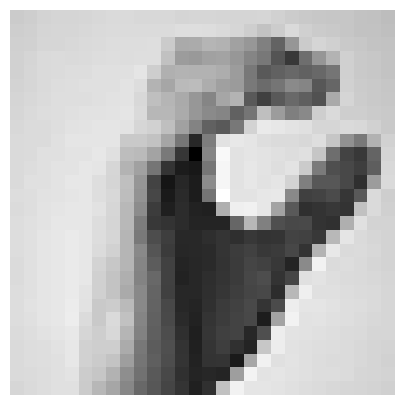

In [80]:
fig = plt.figure(figsize=(12, 8))
img1 = plt.imread(plot_samples(sample_images))
images = [img1, img]
titles = ["Predicted image", "Alphabet in sign language"]
for i in range(2):
  plt.subplot(1,2,i+1), plt.imshow(images[i], cmap = "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.imshow()